In [12]:
import numpy as np
import matplotlib.pyplot as plt
from time import perf_counter_ns

np.random.seed(12)

## Algorithm 1.2.2 Banded Storage Gaxpy
The banded matrix $\bm{A}$ with upper bandwidth $q$ and lower bandwidth $p$. It can be stored in $A.band$ in banded storage.
$$
a_{ij} = A.band(i - j + q + 1, j)
$$

### Create a banded matrix

In [13]:
# Construct a matrix with only non-zero elements on the band
def band_matrix(n, upper_band, lower_band):
    A = np.random.randn(n, n)
    A = np.sqrt(np.triu(A, -lower_band) * np.tril(A, upper_band))
    return A

# Store it in band storage
def band(A, upper_band, lower_band):
    A_band = np.zeros((lower_band + upper_band + 1, n))
    for j in range(0, n):
        a1, a2 = max(0, j - upper_band), min(n, j + lower_band + 1)
        b1 = max(0, upper_band - j)
        b2 = min(n, b1 + a2 - a1)
        A_band[b1:b2, j] = A[a1:a2, j]
    return A_band

### Algorithm implementation

In [14]:
# Do gaxpy on the original matrix
def banded_gaxpy(upper_band, lower_band, A, x, y):
    n = A.shape[0]
    for j in range(0, n):
        a1, a2 = max(0, j - upper_band), min(n, j + lower_band + 1)
        y[a1:a2] = y[a1:a2] + A[a1:a2, j] * x[j]

# Do gaxpy on the matrix in banded storage
def banded_storage_gaxpy(upper_band, lower_band, A_band, x, y):
    n = A_band.shape[1]
    for j in range(0, n):
        a1, a2 = max(0, j - upper_band), min(n, j + lower_band + 1)
        b1 = max(0, upper_band - j)
        b2 = min(n, b1 + a2 - a1)
        y[a1:a2] = y[a1:a2] + A_band[b1:b2, j] * x[j]


### Visualization

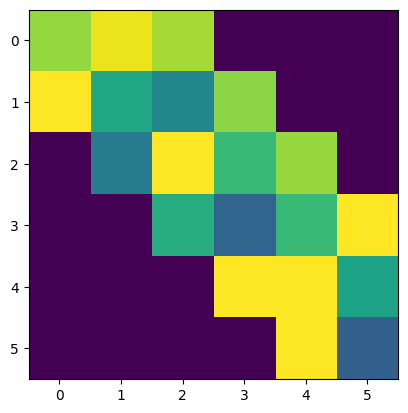

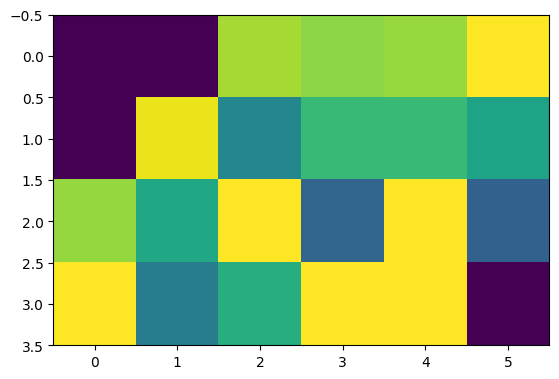

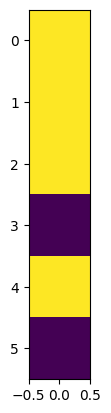

In [ ]:
n = 6
upper_band, lower_band = 2, 1

A = band_matrix(n, upper_band, lower_band)
A_band = band(A, upper_band, lower_band)
y = np.zeros(n)
x = np.ones(1)

banded_storage_gaxpy(upper_band, lower_band, A_band, x, y)

plt.imshow(A, vmin=0, vmax=1)
plt.show()
plt.imshow(A_band, vmin=0, vmax=1)
plt.show()
plt.imshow(y.reshape(n, 1), vmin=0, vmax=1)
plt.show()

### Test the correctness

In [16]:
n = 1000
upper_band = 128
lower_band = 156

A = band_matrix(n, upper_band, lower_band)
A_band = band(A, upper_band, lower_band)
y_correct = np.random.randn(n)
y1 = np.copy(y_correct)
y2 = np.copy(y_correct)
x = np.random.randn(n)

# Use gaxpy
y_correct = y_correct + A @ x

# Use banded storage gaxpy (original storage)
time1 = perf_counter_ns()
banded_gaxpy(upper_band, lower_band, A, x, y1)
time1 = perf_counter_ns() - time1

# Use banded storage gaxpy (banded storage)
time2 = perf_counter_ns()
banded_storage_gaxpy(upper_band, lower_band, A_band, x, y2)
time2 = perf_counter_ns() - time2

# Check answer
correct1, correct2 = np.allclose(y_correct, y1), np.allclose(y_correct, y2)
if correct1 and correct2:
    print('Correct answer!')
    print(f'Time (original storage): {time1 * 1e-6:.3f} ms')
    print(f'Time (banded storage): {time2 * 1e-6:.3f} ms')
else:
    if correct1:
        print('Wrong answer in banded storage!')
    else:
        print('Wrong answer in original storage!')

Correct answer!
Time (original storage): 1.328 ms
Time (banded storage): 1.158 ms
